In [2]:
#1.删除重复数据，并输出去重前后的数据量
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv')

columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id',
    'url', 'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url',
    'subscriptions_url', 'organizations_url', 'repos_url', 'events_url',
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog',
    'location', 'email', 'hireable', 'bio', 'twitter_username', 'public_repos',
    'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

print("去重前数据量:", data.shape[0])

data_deduped = data.drop_duplicates()

print("去重后数据量:", data_deduped.shape[0])


去重前数据量: 20358
去重后数据量: 19779


In [6]:
#2.缺失值处理
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv')

columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'url', 'html_url',
    'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url',
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 
    'site_admin', 'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio',
    'twitter_username', 'public_repos', 'public_gists', 'followers', 'following',
    'created_at', 'updated_at'
]
data = raw_data[columns]

print("缺失值情况（去重前）：")
print(data.isnull().sum())

bool_columns = ['company', 'location', 'blog', 'email', 'hireable', 'bio', 'twitter_username']
for col in bool_columns:
    data.loc[:, col] = data[col].notnull()

text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data.loc[:, col] = data[col].fillna('')

print("\n缺失值情况（转换和填充后）：")
print(data.isnull().sum())


缺失值情况（去重前）：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64

缺失值情况（转换和填充后）：
ac

In [8]:
#3.数据变换，将created_at、updated_at转为时间戳
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv')

columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'url', 'html_url',
    'followers_url', 'following_url', 'gists_url', 'starred_url', 'subscriptions_url',
    'organizations_url', 'repos_url', 'events_url', 'received_events_url', 'type', 
    'site_admin', 'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio',
    'twitter_username', 'public_repos', 'public_gists', 'followers', 'following',
    'created_at', 'updated_at'
]
data = raw_data[columns].copy()  

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

print(data[['created_at', 'updated_at']].head())


   created_at  updated_at
0  1317058023  1697196070
1  1435572766  1696659974
2  1220026803  1696212681
3  1400611389  1697115299
4  1345126753  1696593521


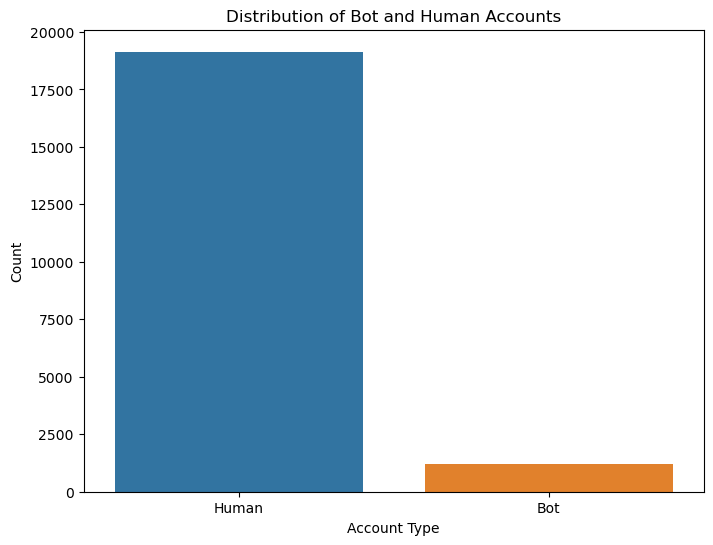

In [9]:
#4.数据可视化
# 4.1 可视化 `bot` 和 `human` 类型账号数量情况

#条形图：条形图适合用于展示分类数据的分布情况。通过条形图对比 `bot` 和 `human` 类型账号的数量分布，可以直观地了解数据集的结构。

#结果分析：数据显示 `human` 类型用户明显多于 `bot` 类型用户，表明 GitHub 平台主要由 `human` 用户组成，而 `bot` 账号占比较小。

#数据洞察：大多数用户是 `human` 类型，这符合平台用户特征。若 `bot` 类型数量较多，可能需要进一步分析是否存在异常用户行为或自动化操作比例较高的情况。

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('github_bot_raw_data.csv')

data = data.drop(columns=['gravatar_id'])

bool_columns = ['company', 'location', 'email', 'hireable']
for col in bool_columns:
    data[col] = data[col].notnull()

text_columns = ['name', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Distribution of Bot and Human Accounts")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


C:\Users\32535\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


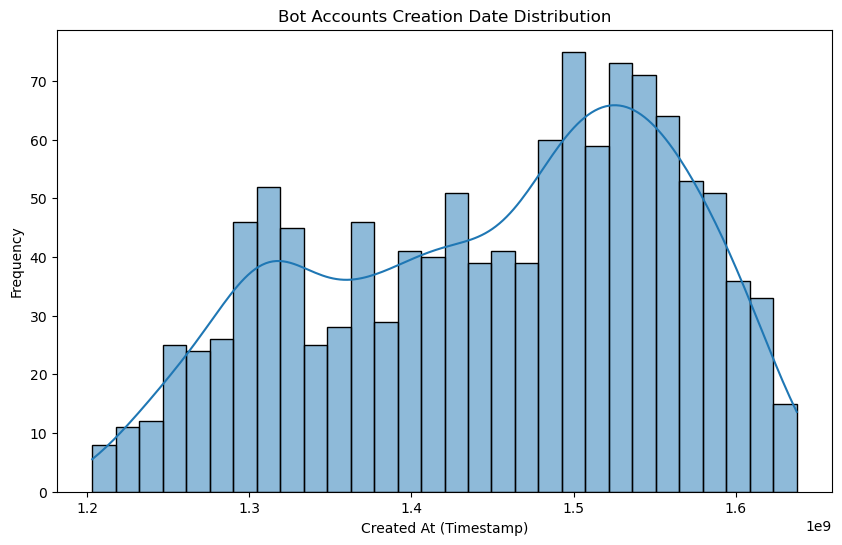

In [10]:
#4.2 可视化 `bot` 类型账号的 `created_at` 分布情况

#柱状图：柱状图可以有效展示数据在时间维度上的分布情况。用于分析 `bot` 账号创建的趋势，了解是否存在特定时期大量注册的情况。

#结果分析： `bot` 类型账号在某一时间段突然激增，这可能表明该时期存在自动化工具的集中部署，或某些自动化任务在该时间段集中增加，但近来降低。

#数据洞察：观察 `bot` 账号的创建时间分布，有助于了解 GitHub 平台上自动化操作的增长趋势，并为安全监控提供信息，尤其是若发现异常波动可能提示自动化账户激增的时间段。


bot_data = data[data['label'] == 'Bot']


plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], kde=True, bins=30)
plt.title("Bot Accounts Creation Date Distribution")
plt.xlabel("Created At (Timestamp)")
plt.ylabel("Frequency")
plt.show()


C:\Users\32535\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


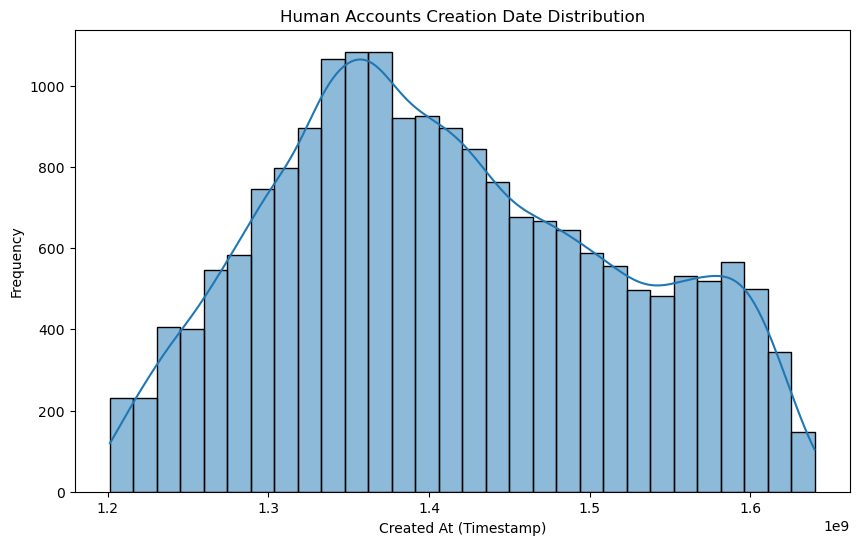

In [11]:
# 4.3 可视化 `human` 类型账号的 `created_at` 分布情况

#时间序列图：时间序列图适合展示 `human` 用户创建账号的长期趋势，尤其适合分析平台用户活跃度和增长的变化。

#结果分析：人类用户的账号注册量稳步上升，但近两年注册量逐渐降低，这可能反映出 GitHub 作为开发者平台的流行度下降（。

#数据洞察：此图表帮助了解平台用户基数增长的趋势，以及开发者社区的增长速度。可为 GitHub 提供未来用户增长预测的依据。

human_data = data[data['label'] == 'Human']

plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], kde=True, bins=30)
plt.title("Human Accounts Creation Date Distribution")
plt.xlabel("Created At (Timestamp)")
plt.ylabel("Frequency")
plt.show()


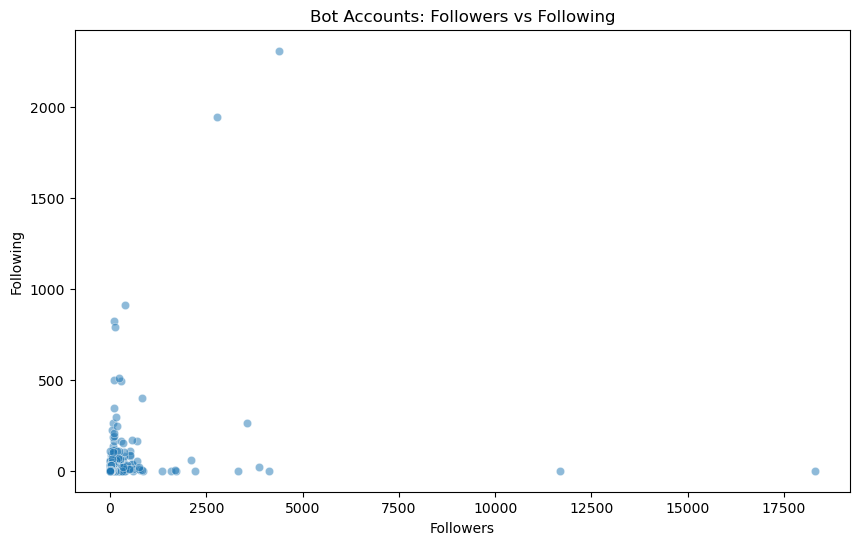

In [12]:
# 4.4 可视化 `bot` 类型账号的 `followers` 和 `following` 分布情况

#散点图：散点图可以显示 `followers` 和 `following` 之间的关系，箱线图则适合展示这两个数值的分布范围和极端值，帮助分析 `bot` 账号的粉丝和关注量分布。

#结果分析：大部分 `bot` 类型账号的 `followers` 和 `following` 较低，但部分异常 `bot` 账号的 `followers` 较高。这可能表示部分 `bot` 账号通过自动关注或关注回粉策略积累粉丝。

#数据洞察：分析 `bot` 账号的粉丝和关注量，可以帮助识别异常的 `bot` 活动（如恶意营销），以及理解平台中常规 `bot` 账号的行为模式。


plt.figure(figsize=(10, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', alpha=0.5)
plt.title("Bot Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()


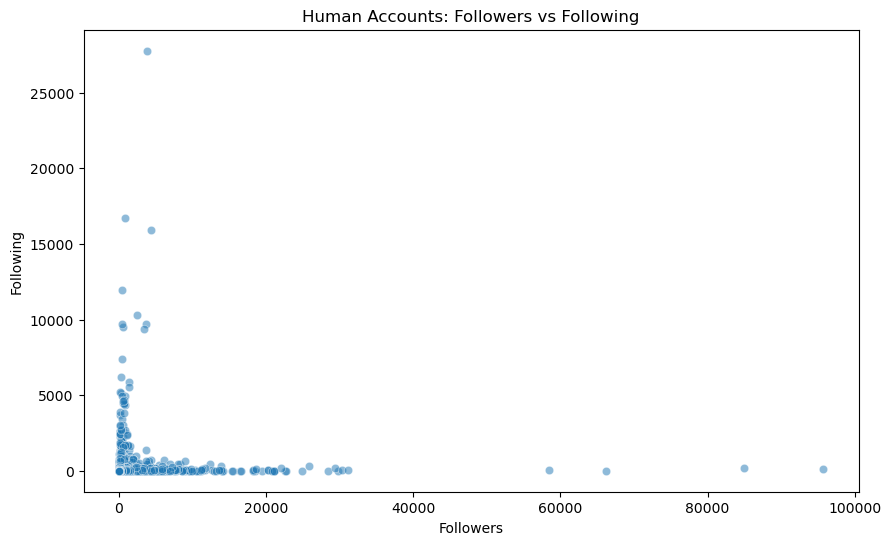

In [13]:
# 4.5 可视化 `human` 类型账号的 `followers` 和 `following` 分布情况

#散点图：`human` 用户在 `followers` 和 `following` 上可能存在更大的差异，特别是影响力较大的用户可能拥有极高的粉丝数，而部分用户关注数较少。

#结果分析：大多数 `human` 用户的 `followers` 和 `following` 较低，但一些用户 `followers` 极高，表明 `human` 用户群体中存在少数高影响力账号。

#数据洞察：理解 `human` 用户的粉丝和关注量分布，有助于识别 GitHub 社区中活跃度较高或影响力较大的用户群体。这些信息对社群构建、内容分发等方面具有重要意义。

plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.5)
plt.title("Human Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()
